In [1]:
from SA.simulatedAnnealing import simulatedAnnealing
from problems.TSP.SimulatedAnnelingOperationsTSP import SimulatedAnnelingOperationsTSP as TSP

from utils.calculations import Point
from utils.manipulationFile import read_txt_file
import utils.cooling as alpha
from utils.graphics import create_plot

In [2]:
PATH: str = "samples/eil51.txt"

In [3]:
points: list[Point] = read_txt_file(PATH)

tsp: TSP = TSP(points)

tsp.best_solution()

num_elements: 51
distance: 1540.1139066539579
elements: [27, 45, 36, 19, 16, 39, 42, 32, 21, 29, 41, 44, 9, 2, 15, 8, 6, 12, 14, 3, 50, 4, 28, 47, 0, 24, 20, 48, 1, 37, 5, 18, 49, 38, 33, 13, 31, 7, 26, 34, 35, 40, 30, 11, 43, 22, 10, 46, 17, 23, 25]

In [4]:
solution, list_interation, list_values, list_temperature = simulatedAnnealing(
    problem=tsp,
    alpha=alpha.cooling_schedule_9,
    SA_max=1,
    T0=100,
    TN=0.001,
    N=1_000
)

1 -48.586047897756316
3 -78.0891112743484
4 -85.19479328241323
7 -26.93106494258859
10 -10.753974315584856
14 -63.86547661046143
20 -28.2703192868762
22 -91.00209411618152
23 -3.6883998702442113
26 -11.534104052684143
27 -39.51215284708496
28 -9.857408537721767
31 -33.492394791810966
35 -3.7908978021537223
38 -5.266392953325067
39 -54.640782910605594
45 -8.45798374734477
46 -43.372868388992174
48 -126.44741555218093
49 -1.3553697735035257
52 -17.181902957819148
53 -22.683237934957333
57 -75.08284051902547
58 -42.2593769662858
59 -18.99302205492495
61 -159.80010066356408
64 -12.305968284445498
65 -23.657710890860017
66 -74.75839880013882
68 -43.614029110500724
73 -60.72216599056151
78 -3.3875102300546587
79 -20.87615134227144
80 -20.661664119246325
82 -98.65785527483195
97 -75.3278431730132
98 -49.84421706045214
102 -3.1281228963277954
103 -195.63956089982457
106 -59.86808160772216
110 -28.170428604435756
111 -7.308953070324151
113 -57.09679475695475
114 -36.65288028468649
117 -4.317819

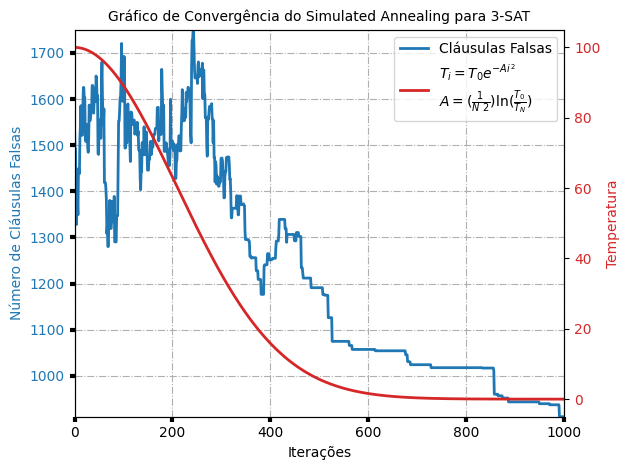

In [5]:
create_plot(
    name="testeTSP.png",
    list_interation=list_interation,
    list_values=list_values,
    list_temperature=list_temperature,
    eq=9
)

In [6]:
solution

num_elements: 51
distance: 911.2735010257052
elements: [32, 8, 2, 19, 1, 30, 48, 40, 39, 18, 17, 24, 42, 47, 11, 4, 29, 33, 20, 6, 23, 25, 7, 22, 0, 28, 15, 10, 45, 37, 31, 21, 27, 26, 5, 3, 46, 13, 16, 41, 43, 14, 44, 38, 35, 34, 49, 9, 36, 50, 12]